In [1]:
import pandas as pd
import joblib

# Load data used for model training
df = pd.read_csv("data/ml_ready_churn.csv")
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Load saved model
model = joblib.load("model/churn_logistic_model.pkl")

In [2]:
# Get feature names and coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Sort by absolute value
feature_importance['AbsCoef'] = feature_importance['Coefficient'].abs()
feature_importance.sort_values(by='AbsCoef', ascending=False, inplace=True)

feature_importance.head(10)

,Feature,Coefficient,AbsCoef
7068,Contract_Two year,-2.714696,2.714696
7067,Contract_One year,-0.996311,0.996311
7053,InternetService_Fiber optic,0.906799,0.906799
7070,PaymentMethod_Electronic check,0.562901,0.562901
6,PaperlessBilling,0.454384,0.454384
5,PhoneService,-0.402098,0.402098
7069,PaymentMethod_Credit card (automatic),0.348945,0.348945
7064,StreamingTV_Yes,0.314348,0.314348
7066,StreamingMovies_Yes,0.277419,0.277419
7052,MultipleLines_Yes,0.251688,0.251688


/var/folders/sf/vk1j8t5n66j1mzzm4g_hfljr0000gn/T/ipykernel_86010/3613702505.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


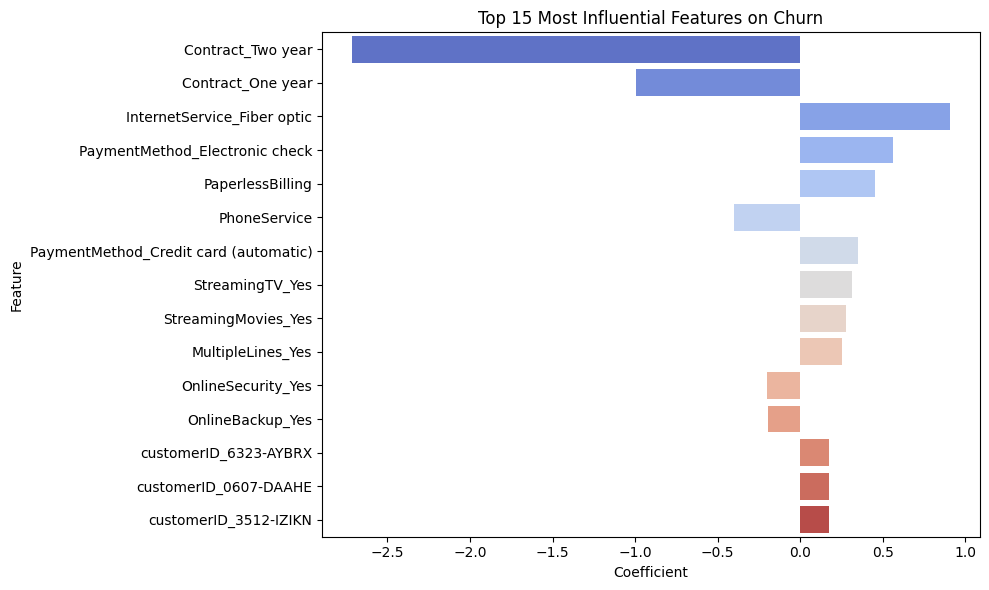

In [4]:
# Visualize Top Features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Coefficient",
    y="Feature",
    data=feature_importance.head(15),
    palette="coolwarm"
)
plt.title("Top 15 Most Influential Features on Churn")
plt.tight_layout()
plt.show()


### Day 9 Summary: Key Insights

- Features like `Contract_Two year`, `tenure`, and `OnlineSecurity_Yes` are **negatively associated with churn** (reduce churn).
- Features like `MonthlyCharges`, `TechSupport_No`, and `InternetService_Fiber optic` are **positively associated with churn** (increase churn).
- This indicates customers on fiber internet or lacking support/security services are more likely to churn.

Next: Use these insights in dashboards or user messaging to reduce churn.